# Classificação Binária com Redes Neurais (PyTorch)

## Constantes e importações

In [19]:
import math
import numpy
from matplotlib import pyplot as plt
from torch import linspace, sin, cos, ones_like, stack, rand, randn, tensor, cat, ones, zeros, sign, randperm, normal, no_grad
from torch.nn.functional import relu, tanh, sigmoid, binary_cross_entropy_with_logits


N = 1000                        # Número total de amostras do dataset
NOISE = 20.                     # Intensidade do ruido de coleta no dataset
SPLIT_RATIO = 0.8               # Porcentagem de dados usados no dataset de treino
BATCH_SIZE = 100                # Tamanho do batch usado durante o treinamento
LEARNING_RATE = 0.05            # Taxa de aprendizado
ACTIVATION = "relu"             # Função de ativação desejada
EPOCHS = 5000                   # Número de épocas de treino
HIDDEN_LAYERS = [32, 32, 32]        # Lista de Hidden Layers

lista_datasets = ["Spiral Dataset", "Gauss Dataset", "Circle Dataset", "XOR Dataset"]
DATASET = lista_datasets[0]     # Índice do dataset desejado

## Datasets

### Dataset de espiral

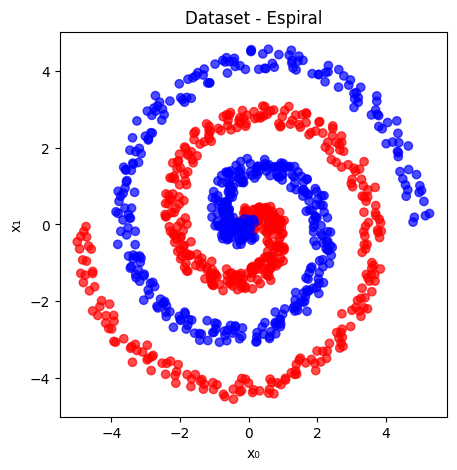

In [2]:
def genSpiral(delta_t, label):
    r = 5*linspace(0., 1., N//2+1)[:N//2]  # Gera um vetor com valores espaçados entre 0 e 5, então pega os N//2 elementos
    t = 0.7*r*math.pi + delta_t  # Calcula um ângulo t para gerar os pontos
    x0 = r*sin(t)  # Calcula a coordenada de cada ponto de raio r e ângulo t, utilizando seno
    x1 = r*cos(t)  # Calcula a coordenada de cada ponto de raio r e ângulo t, utilizando cosseno
    y = label*ones_like(x0)  # Cria um vetor com o valor definido em label e com mesmo tamanho das coordenadas anteriores
    x = stack((x0, x1), -1)  # Combina as coordenadas em um tensor x
    sampled_noise = (NOISE/70.)*(2*rand(N//2, 2) - 1.)  # Cria um tensor com números no intervalo [-1, 1], então multiplica pelo fator de ruído
    x += sampled_noise  # Aplica o ruído gerado ao tensor de dataset
    return x, y  # Retorna o tensor de dataset e o label desse dataset

class SpiralDataset():
    def __init__(self):
        xp, yp = genSpiral(0, 1) # positive samples
        xn, yn = genSpiral(math.pi, -1) # negative samples
        self.X = cat((xp, xn))  # Concatena os tensores positivos e negativos em um único tensor, "empilhando-os"
        self.Y = cat((yp, yn))  # Concatena os vetores de labels positivos e negativos em um único tensor, "empilhando-os"

# Gerando o dataset, instanciando a classe
dataset = SpiralDataset()

# Convertendo os tensores para arrays NumPy (que são aceitos pela Matplotlib)
X = dataset.X.numpy()
Y = dataset.Y.numpy()

# Geração do gráfico
img, eixos = plt.subplots(figsize=(5,5))
scatter = eixos.scatter(
    X[:,0], X[:,1],
    c=Y, cmap='bwr', alpha=0.7
)

eixos.set_xlabel('x₀')
eixos.set_ylabel('x₁')
eixos.set_title('Dataset - Espiral')

plt.show()

### Dataset de Distribuição Gaussiana

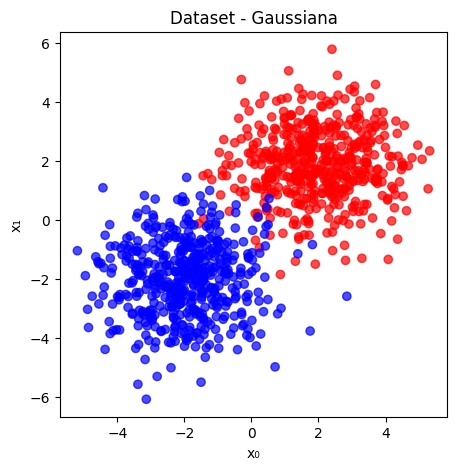

In [3]:
def genGauss(cx0, cx1, label):
    x = 0.7*randn(N//2, 2)  # Cria um tensor com 2 colunas e valores amostrais de uma Distribuição Normal Padrão multiplicados por 0.7
    x = tensor([cx0, cx1]) + x + x*(NOISE/25.)  # Posiciona o tensor criado ao redor da coordenada (cx0, cx1), então aplica um ruído proporcional aos valores do tensor
    y = label*ones(N//2)  # Cria um vetor com o valor definido em label e com mesmo tamanho do tensor anterior
    return x, y  # Retorna o tensor de dataset e o label desse dataset

class GaussDataset():
    def __init__(self):
        xp, yp = genGauss(2, 2, 1) # positive samples
        xn, yn = genGauss(-2, -2, -1) # negative samples
        self.X = cat((xp, xn))  # Concatena os tensores positivos e negativos em um único tensor, "empilhando-os"
        self.Y = cat((yp, yn))  # Concatena os vetores de labels positivos e negativos em um único tensor, "empilhando-os"

# Gerando o dataset, instanciando a classe
dataset = GaussDataset()

# Convertendo os tensores para arrays NumPy (que são aceitos pela Matplotlib)
X = dataset.X.numpy()
Y = dataset.Y.numpy()

# Geração do gráfico
img, eixos = plt.subplots(figsize=(5,5))
scatter = eixos.scatter(
    X[:,0], X[:,1],
    c=Y, cmap='bwr', alpha=0.7
)

eixos.set_xlabel('x₀')
eixos.set_ylabel('x₁')
eixos.set_title('Dataset - Gaussiana')

plt.show()

### Dataset de círculo

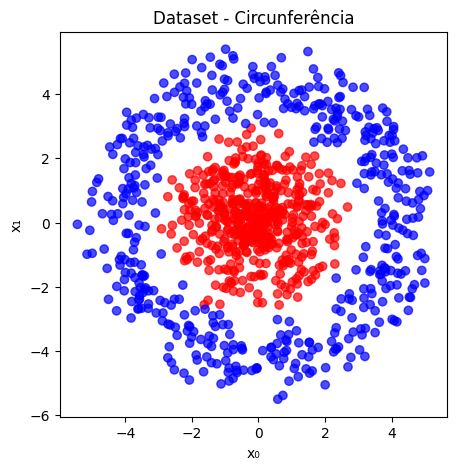

In [4]:
def genCircle(r_min, r_max, label):
    r = (r_max - r_min)*rand(N//2) + r_min  # Cria um raio de valor aleatório no intervalo [r_min, r_max]
    angle = 2*math.pi*rand(N//2)  # Cria ângulos no intervalo [0, 2pi]
    x0 = r*sin(angle)  # Calcula a coordenada de cada ponto de raio r e ângulo angle, utilizando seno
    x1 = r*cos(angle)  # Calcula a coordenada de cada ponto de raio r e ângulo angle, utilizando cosseno
    x = stack((x0, x1), -1)  # Combina as coordenadas em um tensor x
    sampled_noise = (NOISE/35.)*(2*rand(N//2, 2) - 1.)  # Cria um tensor com números no intervalo [-1, 1], então multiplica pelo fator de ruído
    x += sampled_noise  # Aplica o ruído gerado ao tensor de dataset
    y = label*ones_like(x0)  # Cria um vetor com o valor definido em label e com mesmo tamanho das coordenadas anteriores
    return x, y # Retorna o tensor de dataset e o label desse dataset

class CircleDataset():
    def __init__(self):
        xp, yp = genCircle(0, 2.5, 1) # positive samples
        xn, yn = genCircle(3.5, 5, -1) # negative samples
        self.X = cat((xp, xn))  # Concatena os tensores positivos e negativos em um único tensor, "empilhando-os"
        self.Y = cat((yp, yn))  # Concatena os vetores de labels positivos e negativos em um único tensor, "empilhando-os"

# Gerando o dataset, instanciando a classe
dataset = CircleDataset()

# Convertendo os tensores para arrays NumPy (que são aceitos pela Matplotlib)
X = dataset.X.numpy()
Y = dataset.Y.numpy()

# Geração do gráfico
img, eixos = plt.subplots(figsize=(5,5))
scatter = eixos.scatter(
    X[:,0], X[:,1],
    c=Y, cmap='bwr', alpha=0.7
)

eixos.set_xlabel('x₀')
eixos.set_ylabel('x₁')
eixos.set_title('Dataset - Circunferência')

plt.show()

### Dataset da operação lógica XOR

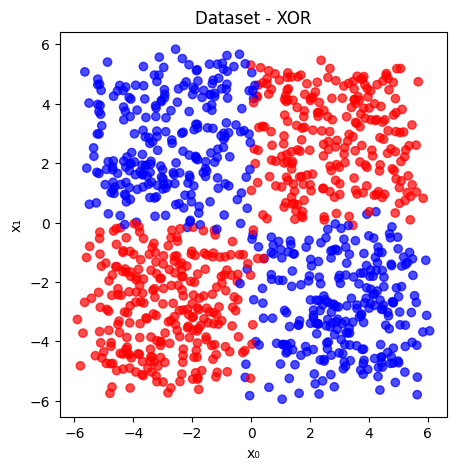

In [5]:
def genXOR():
    x = 10.*rand(N, 2) - 5.  # Gera um tensor com valores no intervalo [-5, 5]
    y = sign(x[:,0]*x[:,1])  # Calcula o produto entre as coordenadas de cada ponto, gerando a lógica XOR
    padding = 0.3  # Define uma pequena margem para auxiliar a dividir os pontos
    x += sign(x)*padding  # Adiciona o padding ao dataset, distanciando os pontos das margens
    sampled_noise = (NOISE/25.)*(2*rand(N, 2) - 1.)  # Cria um tensor com números no intervalo [-1, 1], então multiplica pelo fator de ruído
    x += sampled_noise  # Aplica o ruído gerado ao tensor de dataset
    return x, y  # Retorna o tensor de dataset e o label desse dataset

class XORDataset():
    def __init__(self):
        self.X, self.Y = genXOR()  # Gera o dataset

# Gerando o dataset, instanciando a classe
dataset = XORDataset()

# Convertendo os tensores para arrays NumPy (que são aceitos pela Matplotlib)
X = dataset.X.numpy()
Y = dataset.Y.numpy()

# Geração do gráfico
img, eixos = plt.subplots(figsize=(5,5))
scatter = eixos.scatter(
    X[:,0], X[:,1],
    c=Y, cmap='bwr', alpha=0.7
)

eixos.set_xlabel('x₀')
eixos.set_ylabel('x₁')
eixos.set_title('Dataset - XOR')

plt.show()

## Modelagem e Treinamento

### Divisão do dataset

In [24]:
def train_test_split(dataset):

    # Descobre o número real de amostras no dataset
    num_samples = len(dataset.X)

    # Obtém os números de 0 a N embaralhados
    shuffle = randperm(num_samples)

    # Calcula o tamanho do conjunto de treino
    train_size = int(SPLIT_RATIO * num_samples)

    # Separa índices de treino e de teste
    train_idx = shuffle[:train_size]
    test_idx  = shuffle[train_size:]

    # Slicing dos tensores X e Y
    X_train = dataset.X[train_idx]
    Y_train = dataset.Y[train_idx]
    X_test  = dataset.X[test_idx]
    Y_test  = dataset.Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

### Modelo, inferência e update dos pesos e viéses

In [7]:
class Model:
    def __init__(self, hidden_layers):

        # Inicialização das variáveis
        self.hidden_layers = hidden_layers
        self.weights = None
        self.biases  = None

    def inference(self, inp):

        # Obtém o nome e a função de ativação desejada
        act = self._activation_function(ACTIVATION)

        # Inicializa parâmetros na primeira chamada, usando inp.shape[1] como a dimensão da entrada dos dados, a quantidade de features
        if self.weights is None:

            # Construção da estrutura da rede neural, especificando as camadas e a quantidade de neurônios por camada
            dims = [2] + self.hidden_layers + [1]

            self.weights = []
            self.biases  = []

            # Iterando para cada par de dimensões de entrada e saída
            for entrada, saida in zip(dims[:-1], dims[1:]):

                # Caso a função de ativação for a ReLU, utiliza a inicialização de He
                if act == relu:
                  std = math.sqrt(2.0 / entrada)

                # Caso a função de ativação seja tanh, sigmoid, ou alguma outra, utiliza a inicialização Normal de Xavier
                else:
                  std = math.sqrt(2.0 / (entrada + saida))

                # Inicialização de uma matriz de pesos nas dimensões corretas, com desvio padrão calculado conforme a função de ativação
                W = normal(0.0, std, (entrada, saida), requires_grad=False)

                # Ativa requires_grad(), armazenando as operações que serão feitas
                W.requires_grad_()

                # Cria o Bias
                b = zeros(saida, requires_grad=True)

                # Armazena os pesos e viéses criados em suas determinadas listas
                self.weights.append(W)
                self.biases.append(b)

        # Instanciação do input
        x = inp

        # Cálculo das Hidden Layers
        for W, b in zip(self.weights[:-1], self.biases[:-1]):
            # A saída de uma camada é a entrada da próxima
            x = act(x @ W + b)

        # Última camada (logit)
        W_out, b_out = self.weights[-1], self.biases[-1]
        logit = x @ W_out + b_out

        # Retorna a saída do modelo sem passar por função de ativação
        return logit


    # Para verificar se o gradiente está funcionando, colocar o batch_size do tamanho do dataset, para que não ocorra a parte estocástica do GD
    # Então deixar o learning rate bem baixo e rodar o código, observando se a loss vai sempre diminuir e nunca aumentar, mesmo que bem lentamente
    def update(self, x_train_full, y_train_full):
         # Embaralha os índices do tamanho dos dados de treino
        perm = randperm(len(x_train_full))

        # Seleciona os índices embaralhados até alcançar a quantidade delimitada por BATCH_SIZE
        idx = perm[:BATCH_SIZE]

        # Obtém os dados dos índices selecionados
        x_batch = x_train_full[idx]
        y_batch = y_train_full[idx]

        # Chama a inferência com os dados selecionados
        logits = self.inference(x_batch)

        # Converte a saída para 0 ou 1
        y_hat = (y_batch > 0).float().unsqueeze(1)  # Adiciona dimensão extra para bater com os logits

        # Calcula a loss
        loss = binary_cross_entropy_with_logits(logits, y_hat)

        # Backward
        loss.backward()

        with no_grad():
            for W, b in zip(self.weights, self.biases):

                # Atualiza os parâmetros com o gradiente descendente
                W.data -= LEARNING_RATE * W.grad
                b.data -= LEARNING_RATE * b.grad

                # Limpa o gradiente para a próxima iteração
                W.grad.zero_()
                b.grad.zero_()

        # Retorna o valor numérico da loss
        return loss.item()

    # Função auxiliar que retorna a função de ativação desejada
    @staticmethod
    def _activation_function(name):
        name = name.lower()
        if name == "relu":
            return relu
        elif name == "tanh":
            return tanh
        elif name == "sigmoid":
            return sigmoid
        else:
            raise ValueError(f"Ativação '{name}' não suportada.")

### Treinamento e gráfico de evolução da função de Loss

Época 0: Train Loss 0.7183 | Test Loss 0.7963
Época 100: Train Loss 0.6442 | Test Loss 0.7496
Época 200: Train Loss 0.6663 | Test Loss 0.6995
Época 300: Train Loss 0.6485 | Test Loss 0.6861
Época 400: Train Loss 0.6768 | Test Loss 0.7038
Época 500: Train Loss 0.6180 | Test Loss 0.7024
Época 600: Train Loss 0.6175 | Test Loss 0.6848
Época 700: Train Loss 0.6183 | Test Loss 0.6963
Época 800: Train Loss 0.5825 | Test Loss 0.6730
Época 900: Train Loss 0.6251 | Test Loss 0.6701
Época 1000: Train Loss 0.6435 | Test Loss 0.6467
Época 1100: Train Loss 0.6309 | Test Loss 0.6373
Época 1200: Train Loss 0.6349 | Test Loss 0.6606
Época 1300: Train Loss 0.5954 | Test Loss 0.6406
Época 1400: Train Loss 0.5842 | Test Loss 0.5993
Época 1500: Train Loss 0.5491 | Test Loss 0.5857
Época 1600: Train Loss 0.5355 | Test Loss 0.6103
Época 1700: Train Loss 0.4977 | Test Loss 0.5602
Época 1800: Train Loss 0.4953 | Test Loss 0.5237
Época 1900: Train Loss 0.4190 | Test Loss 0.4705
Época 2000: Train Loss 0.3928 | 

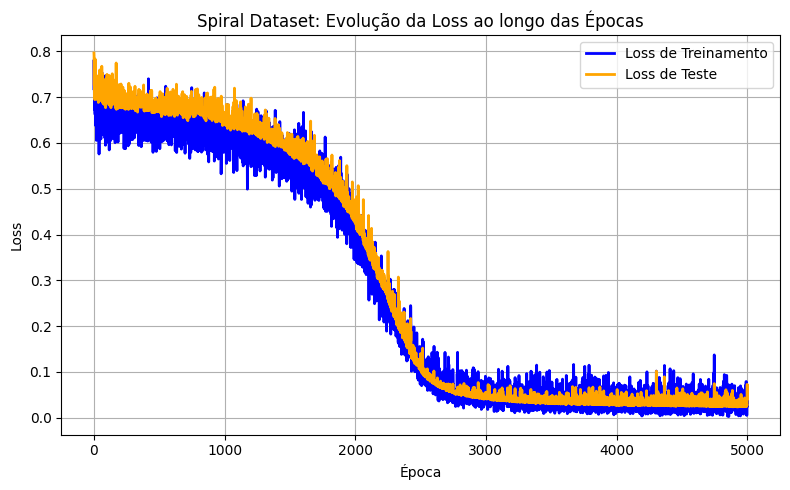

In [25]:
# Função para plotar as losses de treinamento e teste.
def plot_losses(train_losses, test_losses, dataset_name):
    epochs = list(range(1, len(train_losses) + 1))
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, label="Loss de Treinamento", color="blue", linewidth=2)
    plt.plot(epochs, test_losses, label="Loss de Teste", color="orange", linewidth=2)
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.title(f"{dataset_name}: Evolução da Loss ao longo das Épocas")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


def get_dataset(dataset_name):
    if dataset_name == "Spiral Dataset":
        return SpiralDataset()
    elif dataset_name == "Gauss Dataset":
        return GaussDataset()
    elif dataset_name == "Circle Dataset":
        return CircleDataset()
    elif dataset_name == "XOR Dataset":
        return XORDataset()
    else:
        raise ValueError(f"Dataset '{dataset_name}' não suportado.")


# Gera o dataset
dataset = get_dataset(DATASET)

# Divide o dataset
(train_X, train_Y), (test_X, test_Y) = train_test_split(dataset)


def train_loop():
    # Cria o modelo com a lista de hidden_layers
    model = Model(HIDDEN_LAYERS)

    # Lista de armazenamento das losses
    train_losses = []
    test_losses = []

    # Loop de treinamento
    for epoch in range(EPOCHS):

        # Atualiza parâmetros e obtém a loss do batch de treinamento.
        train_loss = model.update(train_X, train_Y)
        train_losses.append(train_loss)

        with no_grad():
            # Avaliação no conjunto de teste:
            logits_test = model.inference(test_X)

            # Converte a saída para 0 ou 1.
            y_test_hat = (test_Y > 0).float().unsqueeze(1)

            # Calcula a loss do testset e adiciona na lista
            loss_test = binary_cross_entropy_with_logits(logits_test, y_test_hat)
            test_losses.append(loss_test.item())

        if epoch % 100 == 0:
            print(f"Época {epoch}: Train Loss {train_loss:.4f} | Test Loss {loss_test.item():.4f}")

    plot_losses(train_losses, test_losses, DATASET)


train_loop()